# Group 27 (Assignment 1)
* Andrey Protas 03738997
* Weixing Wang 03698938
* Daniyal Khalid 03748318
* Saqib Khan 03750897
* Mujtaba Shahid Faizi 03749649
* Utku Ayvaz 03690266

In [ ]:
# Packages
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

## Task1


* $C_1$ is a unit cube centered around origin. $C_d$ is a cube with side d, centered around origin. Since X is uniformly distributed, probability is proportional to relative volume of 2 cubes, but no larger than 1.
    * For $q=1$, then d can be any value $\geq 1$, regardless of p, since whole $C_1$ lies within $C_d$.
    * For $q=0$, then $d=0$, regardless of p, since probability can only be 0, if volume is 0, otherwise it's positive.
    * For $q \in (0,1)$, we have: $\dfrac{d^p}{1^p}=q$, take $\sqrt[p]{}$ of both sides, we get $d=\sqrt[p]{q}$.
* $Pr(\lVert X^p \rVert_\infty > 2.576) = 1 - Pr(\lVert X^p \rVert_\infty \leq 2.576) \stackrel{ind. components}{=} 1 - (Pr(\lVert X \rVert_\infty \leq 2.576))^p = 1-0.99^p$

In [ ]:
print("For p=2: ", 1-0.99**2, "\nFor p=3: ", 1-0.99**3, "\nFor p=500: ", 1-0.99**500)

For p=2:  0.01990000000000003 
For p=3:  0.029700999999999977 
For p=500:  0.9934295169575854


## Task2

### Part1
### Create 100 random vectors with 2 dimensions

In [ ]:
random_vectors=(np.random.rand(100,2)-0.5)*2

### Part2
### Determine the minimum angles between 100 vectors and take their average 

In [ ]:
#Calculate the norm of the vectors
norms=np.linalg.norm(random_vectors,axis=1)
min_angle=np.zeros(100)

for i in range(100):
    main_vector=random_vectors[i,:]
    
    #Calculate <x,y>
    xTy = main_vector@random_vectors.T
    xnorm=norms[i]
    #Norm multiplication
    norm_multi=xnorm*norms
    
    #Delete the column which was calculated with the same vector
    xTy=np.delete(xTy, i, 0)
    norm_multi=np.delete(norm_multi, i, 0)
    
    angles=np.arccos(xTy/norm_multi)
    min_angle[i]=np.min(angles)
average_angle=np.mean(min_angle)

### Part3
### Determine the minimum angles between 100 vectors and take their average

In [ ]:
def angleDimension(dimension,sample_number=100):
    random_vectors=(np.random.rand(sample_number,dimension)-0.5)*2
    norms=np.linalg.norm(random_vectors,axis=1)
    min_angle=np.zeros(sample_number)
    for i in range(sample_number):
        main_vector=random_vectors[i,:]
        xTy = main_vector@random_vectors.T
        xnorm=norms[i]
        norm_multi=xnorm*norms

        #Delete the column which was calculated with the same vector
        xTy=np.delete(xTy, i, 0)
        norm_multi=np.delete(norm_multi, i, 0)
        
        #Calculate the angles to other vectors
        angles=np.arccos(xTy/norm_multi)
        min_angle[i]=np.min(angles)
    average_angle=np.mean(min_angle)
    return average_angle

### Then plot the results with 100 samples

  0%|          | 0/1000 [00:00<?, ?it/s]

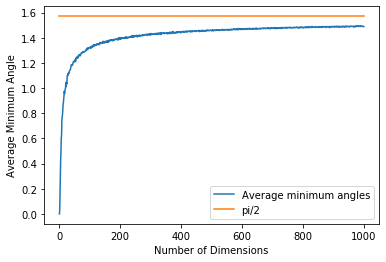

In [ ]:
average_minimums=[angleDimension(dimension) for dimension in tqdm(range(1,1001))]
plt.plot(np.arange(1,1001),average_minimums, label="Average minimum angles")
plt.plot(np.arange(1,1001),np.pi/2*np.ones(1000),label="pi/2")
plt.xlabel("Number of Dimensions")
plt.ylabel('Average Minimum Angle')
plt.legend()
plt.show()

### Part4
### Plot the results with 2 samples

  0%|          | 0/1000 [00:00<?, ?it/s]

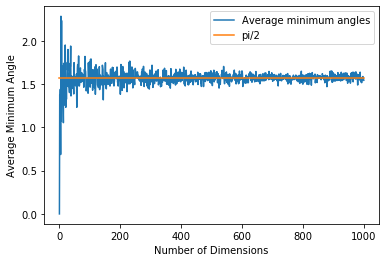

In [ ]:
average_minimums=[angleDimension(dimension,sample_number=2) for dimension in tqdm(range(1,1001))]
plt.plot(np.arange(1,1001),average_minimums, label="Average minimum angles")
plt.plot(np.arange(1,1001),np.pi/2*np.ones(1000),label="pi/2")
plt.xlabel("Number of Dimensions")
plt.ylabel('Average Minimum Angle')
plt.legend()
plt.show()

<strong>Give an interpretation of the result. What conclusions can you draw for 2 randomly sampled vectors in a d-dimensional space?</strong>

<p>The average minimum angle between two vectors starts to become constant in higher dimensions. For two randomly sampled vectors, the vectors start to become equidistant as d is increased. </p>

<strong> Does the result change if the sample size increases?</strong>

### Part5
### Plot the results with 1000 samples

  0%|          | 0/1000 [00:00<?, ?it/s]

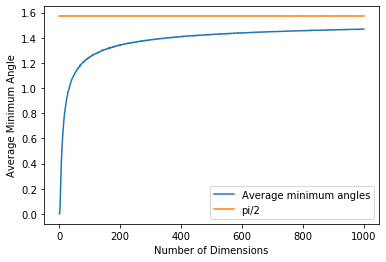

In [ ]:
average_minimums=[angleDimension(dimension,sample_number=1000) for dimension in tqdm(range(1,1001))]
plt.plot(np.arange(1,1001),average_minimums, label="Average minimum angles")
plt.plot(np.arange(1,1001),np.pi/2*np.ones(1000),label="pi/2")
plt.xlabel("Number of Dimensions")
plt.ylabel('Average Minimum Angle')
plt.legend()
plt.show()

### Plot the results with 5 samples

  0%|          | 0/1000 [00:00<?, ?it/s]

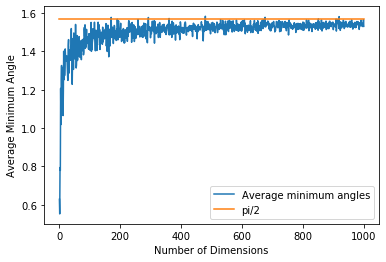

In [ ]:
average_minimums=[angleDimension(dimension,sample_number=5) for dimension in tqdm(range(1,1001))]
plt.plot(np.arange(1,1001),average_minimums, label="Average minimum angles")
plt.plot(np.arange(1,1001),np.pi/2*np.ones(1000),label="pi/2")
plt.xlabel("Number of Dimensions")
plt.ylabel('Average Minimum Angle')
plt.legend()
plt.show()

As we can see above, the result is similar even if we change the sample size from 100 to 1000. If we change the sample size to a very small value like 5, then the trend is still the same although the data points are noisier. So the result does not change if the sample size changes.

## Task3

### Question 3 (a):
The numbers in Figure 1 show the probability of the respective event to happen (e.g. the probability for the event X = 1 and Y = 1 is 0.02). Is this table a probability table? If so, why?

Yes, it is the <b>Conditional Probability Table (CFT)</b> and it is defined for a set of discrete and mutually dependent random variables <b>X</b> and <b>Y</b>. The reason being that all the numbers in this table sum to 1 which represents the total joint probability distribution of the random variables.

### Question 3 (b):
Based on Figure 1 give the conditional expectation E[Y|X=2][Y] and the probability of the event X = 1 under the condition that Y = 3.

In [ ]:
p_table = np.array([[0.4, 0.14,0.05], [0.02,0.26,0.13]])

Marginal Probabilities of random variables $X$ and $Y$:

In [ ]:
p_x = np.sum(p_table, axis=1)
p_y = np.sum(p_table, axis=0)

print('Marginal probability of X: [P(x=2), P(x=1)] = {}'.format(p_x))
print('Marginal probability of Y: [P(y=1), P(y=2), P(y=3)] = {}'.format(p_y))

Marginal probability of X: [P(x=2), P(x=1)] = [0.59 0.41]
Marginal probability of Y: [P(y=1), P(y=2), P(y=3)] = [0.42 0.4  0.18]


Conditional Expectation of $E_{Y|X=2}[Y]$:

In [ ]:
Y = np.array([1,2,3])
conditional_expectation = np.sum(np.dot(Y, p_table[0] / p_x[0]))

print("\n Conditional expectation: {}".format(conditional_expectation))


 Conditional expectation: 1.4067796610169492


Conditional Prbability of $X=1$, given $Y=3$

In [ ]:
p_x1y3 = p_table[1][2] / p_y[2]

print("\nConditional probability of X=1, given Y=3 = {}".format(p_x1y3))


Conditional probability of X=1, given Y=3 = 0.7222222222222223


### Question 3 (c):

$\int_0^{1/2} \int_0^1 1\,dx\,dy = \int_0^{1/2} x\Big|_0^1 dy = \int_0^{1/2} 1\,dy = y\Big|_0^{1/2} = 1/2 \neq 1$

Therefore, given function can not be a joint density function of two random variables X and Y.

### Question 3 (d):

$P_X (x) = \int_x^\infty 2e^{-(x+y)} dy = \int_x^\infty 2e^{-x}e^{-y}dy = 2e^{-x}\int_x^\infty e^{-y}dy = 2e^{-x}(-e^{-y}\Big|_x^\infty) = 2e^{-x}(0+e^{-x}) = 2e^{-2x}$

$P_Y (y) = \int_0^y 2e^{-(x+y)} dx = \int_0^y 2e^{-x}e^{-y}dx = 2e^{-y}\int_0^y e^{-x}dx = 2e^{-y}(-e^{-x}\Big|_0^y) = 2e^{-y}(-e^{-y}+1) = 2e^{-y}(1 - e^{-y})$

$P_X (x) = \begin{cases}
2e^{-x}&\text{for $x \geq 0$}\\
0&\text{otherwise}\\
\end{cases}$

$P_Y (y) =
\begin{cases}
2e^{-y}(1 - e^{-y})&\text{for $y \geq 0$}\\
0&\text{otherwise}\\
\end{cases}$

### Question 3 (e):

$P_Y (y)$ for $ 0 < x < 3$
$= \int_0^3 \frac{1}{15}(2x+4y) dx$
$= \frac{2}{15} \int_0^3 x dx + \frac{4y}{15}  \int_0^3 1 dx$
$= \frac{2}{15} \frac{x^2}{2}\Big|_0^3 + \frac{4y}{15}  x\Big|_0^3$
$= \frac{2}{15} (\frac{9}{2}) + \frac{4y}{15} (3)$
$= \frac{3+4y}{5}$

$P(X\leq2 | Y=\frac{1}{2})$
$= \int_0^2 \frac{P(x,y)}{P_Y(y)}dx$
$= \int_0^2(\frac{2x+4y}{15}.\frac{5}{3+4y})$
$= \frac{1}{9+12y}\int_0^2 (2x+4y) dx$
$= \frac{1}{9+12y} (2\frac{x^2}{2}\Big|_0^2 + 4y\,x\Big|_0^2)$
$= \frac{1}{9+12y}(4+8y) $
$\text{for $Y=\frac{1}{2}$, we get}\\ $
$P(X\leq2 | Y=\frac{1}{2})$
$= \frac{8}{15}$

## Task4

Because
$$
\begin{align}
C &= E[(X-\mu)(X-\mu)^T] \\
\end{align}
$$ 
we have
$$
\begin{align}
C^T &= E[(X-\mu)(X-\mu)^T]^T \\
&= E[((X-\mu)(X-\mu)^T)^T] \\
&= E[(X-\mu)(X-\mu)^T] \\
&= C 
\end{align}
$$ 
$C$ is symmetric. \
For any $y \in R^p$, we have 
$$
\begin{align}
y^TCy &= y^TE[(X-\mu)(X-\mu)^T]y \\
&= E[y^T(X-\mu)(X-\mu)^Ty] \\
&= E[((X-\mu)^Ty)^2] \geq0\\
\end{align}
$$ 
thus $C$ is positive semidefinite